In [5]:
!pip install scikit-learn==0.23.1

^C


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

Loading data

In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


Checking how many of each class is in our data

In [8]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

281 Plus service , 266 basic-service, 236 total service, and 217 E-service customer  

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

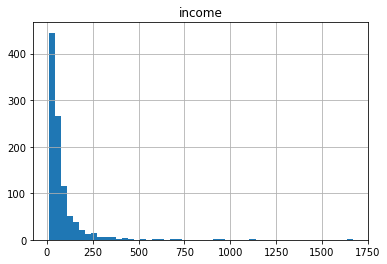

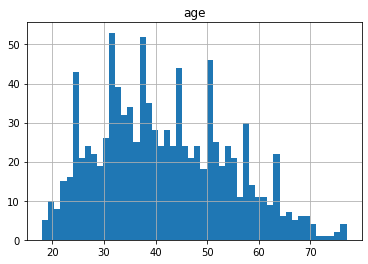

In [10]:
df.hist(column = 'income', bins = 50)
df.hist(column = 'age', bins = 50)

<h2>lest define  our feature sets, X:</h2>

In [12]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

For us to use scikit-learn we have to change the dataframe to a numpy array

In [13]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values  #.astype(float)
X[0:10]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.],
       [  2.,  41.,  39.,   0.,  17.,  78.,   2.,  16.,   0.,   1.,   1.],
       [  3.,  45.,  22.,   1.,   2.,  19.,   2.,   4.,   0.,   1.,   5.],
       [  2.,  38.,  35.,   0.,   5.,  76.,   2.,  10.,   0.,   0.,   3.],
       [  3.,  45.,  59.,   1.,   7., 166.,   4.,  31.,   0.,   0.,   5.],
       [  1.,  68.,  41.,   1.,  21.,  72.,   1.,  22.,   0.,   0.,   3.]])

In [37]:
y = df['custcat'].values
y[0:10]

array([1, 4, 3, 1, 3, 3, 2, 4, 3, 2], dtype=int64)

Normaize data

In [38]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train_set:', X_train.shape, y_train.shape)
print('Test_set:', X_test.shape, y_test.shape)

Train_set: (800, 11) (800,)
Test_set: (200, 11) (200,)


<b>Classification</b>
<b> K Nearest neighbor (KNN)</b>

In [40]:
from sklearn.neighbors import KNeighborsClassifier

<b>Training the model</b>

In [41]:
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

<b>Predicting</b>

In [42]:
yhat = neigh.predict(X_test)
yhat[0:10]

array([1, 1, 3, 2, 4, 3, 3, 2, 2, 4], dtype=int64)

<b>Accuracy Evaluation</b>

In [45]:
from sklearn import metrics
print('Train set Accuracy:', metrics.accuracy_score(y_train, neigh.predict(X_train)))
print('Test set Accuracy:', metrics.accuracy_score(y_test, yhat))

Train set Accuracy: 0.5475
Test set Accuracy: 0.32


<h2>Practice</h2>

<b>Building KNN model where k=6 </b>

In [46]:
k = 6
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=6)

<b>Predicting</b>

In [48]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([3, 3, 3, 4, 4], dtype=int64)

<b>Accuracy Evaluation</b>

In [51]:
print('Train set Accuracy:', metrics.accuracy_score(y_train, neigh.predict(X_train)))
print('Test set Accuracy:', metrics.accuracy_score(y_test, yhat))

Train set Accuracy: 0.51625
Test set Accuracy: 0.31


Calculating the accuracy of KNN for different values of K

In [54]:
Ks  = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat  = neigh.predict(X_test)
    
    mean_acc[n-1] = metrics.accuracy_score(y_test,yhat)
    
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

Plotting the model accuracy for a different number of neighbors.

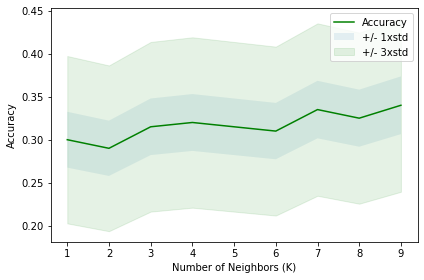

In [63]:
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color='green')
plt.legend(('Accuracy', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [66]:
print('The best accuracy was with', mean_acc.max(), 'with k =', mean_acc.argmax()+1)

The best accuracy was with 0.34 with k = 9
